<a href="https://colab.research.google.com/github/aidsdarshana/A-B-Testing-Analysis-Codelalpha/blob/main/A_B_Testing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CodeAlpha Internship:**





Name: DARSHANA P



Student ID: CD/03/45392





Task No: 3


Take Name: A/B Testing Analysis

Batch: 1 october 2024

### **Import Libraries**

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  **Import DataSet**

In [2]:
home=pd.read_csv('/content/smart_home_energy_usage_dataset.csv.zip')

In [3]:
home.head()

,timestamp,home_id,energy_consumption_kWh,temperature_setting_C,occupancy_status,appliance,usage_duration_minutes,season,day_of_week,holiday
0,2023-01-01 00:00:00,44,2.87,22.1,Occupied,Refrigerator,111,Spring,Sunday,0
1,2023-01-01 01:00:00,81,0.56,15.4,Occupied,HVAC,103,Summer,Sunday,0
2,2023-01-01 02:00:00,94,4.49,22.4,Occupied,Electronics,12,Autumn,Sunday,0
3,2023-01-01 03:00:00,20,2.13,24.6,Unoccupied,Dishwasher,54,Autumn,Sunday,0
4,2023-01-01 04:00:00,3,2.74,21.4,Unoccupied,HVAC,6,Summer,Sunday,0


In [4]:
# Create new data with Required field name
newhome=home[['home_id', 'energy_consumption_kWh', 'occupancy_status']]

In [5]:
newhome.head()

,home_id,energy_consumption_kWh,occupancy_status
0,44,2.87,Occupied
1,81,0.56,Occupied
2,94,4.49,Occupied
3,20,2.13,Unoccupied
4,3,2.74,Unoccupied


### **Create New DataSet newhome.csv**

In [6]:
newhome.to_csv('newhome.csv')

In [7]:
# find the null value using isnull function
newhome.isnull().sum()

,0
home_id,0
energy_consumption_kWh,0
occupancy_status,0


### **Seperate the Group A and Group B**

In [8]:
# Seperate the Group A ="Occupied"
occupied=newhome[newhome['occupancy_status']=='Occupied']['energy_consumption_kWh']
# Seperate the Group B="Unoccupied"
unoccupied=newhome[newhome['occupancy_status']=='Unoccupied']['energy_consumption_kWh']

In [9]:
print(occupied)

0         2.87
1         0.56
2         4.49
6         4.53
10        4.38
          ... 
999992    3.56
999994    3.71
999996    2.09
999998    0.16
999999    2.95
Name: energy_consumption_kWh, Length: 500394, dtype: float64


In [10]:
print(unoccupied)

3         2.13
4         2.74
5         0.66
7         2.17
8         3.34
          ... 
999990    4.26
999991    3.09
999993    4.73
999995    1.35
999997    0.43
Name: energy_consumption_kWh, Length: 499606, dtype: float64


### **T - TEST**

In [11]:
# perform t- Test
t_stat, p_value = stats.ttest_ind(occupied, unoccupied)

### **Average of Group A and B**

In [14]:
avg_occu=np.mean(occupied)
avg_unoccu=np.mean(unoccupied)

In [15]:
# Display the Results
print(f"Average Energy Consumption (Occupied): {avg_occu:.2f} kWh")
print(f"Average Energy Consumption (Unoccupied): {avg_unoccu:.2f} kWh")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

Average Energy Consumption (Occupied): 2.55 kWh
Average Energy Consumption (Unoccupied): 2.55 kWh
T-statistic: 0.70
P-value: 0.48558


### **Result**

In [20]:
# significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in energy consumption between the two groups.")
    if avg_occu < avg_unoccu:
        print("Group A (Occupied) is more efficient.")
    else:
        print("Group B (Unoccupied) is more efficient.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in energy consumption between the two groups.")

Fail to reject the null hypothesis: There is no significant difference in energy consumption between the two groups.


### **Visualization**

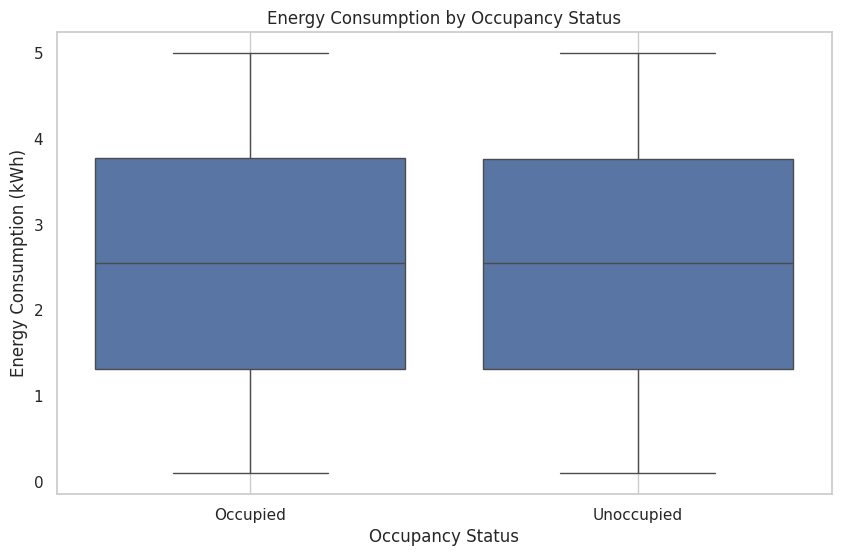

In [18]:
# Set Style
sns.set(style="whitegrid")
# Create a boxplot to visualize energy consumption
plt.figure(figsize=(10, 6))
sns.boxplot(x='occupancy_status', y='energy_consumption_kWh', data=newhome)
plt.title('Energy Consumption by Occupancy Status')
plt.xlabel('Occupancy Status')
plt.ylabel('Energy Consumption (kWh)')
plt.grid()
plt.show()